In [1]:
from scipy import stats
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
#import pymc3 as pm
import seaborn as sns
import pandas as pd
#from theano import shared
from sklearn import preprocessing

In [2]:
pune = pd.read_csv('preci_all.csv')
beed = pd.read_csv('preci_all1.csv')
sangli = pd.read_csv('preci_all2.csv')

In [3]:
import datetime

In [4]:
pune['system:index'] = pd.to_datetime(pune['system:index'],format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d %H:%M:%S')
beed['system:index'] = pd.to_datetime(beed['system:index'],format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d %H:%M:%S')
sangli['system:index'] = pd.to_datetime(sangli['system:index'],format='%Y%m%d%H%M%S').dt.strftime('%Y-%m-%d %H:%M:%S')

In [5]:
del pune['date'],pune['.geo'],beed['date'],beed['.geo'],sangli['date'],sangli['.geo']

In [6]:
pune.columns = pd.Index(['date','value'])
beed.columns = pd.Index(['date','value'])
sangli.columns = pd.Index(['date','value'])

In [7]:
pune['date'] = pd.to_datetime(pune['date'])
beed['date'] = pd.to_datetime(beed['date'])
sangli['date'] = pd.to_datetime(sangli['date'])

In [8]:
pune.set_index("date", inplace = True)
beed.set_index("date", inplace = True)
sangli.set_index("date", inplace = True)

In [9]:
pune1 = pune.resample('D').sum()
beed1 = beed.resample('D').sum()
sangli1 = sangli.resample('D').sum()

In [10]:
pune2 = pune.resample('M').sum()
beed2 = beed.resample('M').sum()
sangli2 = sangli.resample('M').sum()

In [11]:
pune2 = pune2.reset_index()
beed2 = beed2.reset_index()
sangli2 = sangli2.reset_index()

In [12]:
pune2['date'] = pd.to_datetime(pune2['date'],format='%Y%m%d').dt.strftime('%Y-%m')
sangli2['date'] = pd.to_datetime(sangli2['date'],format='%Y%m%d').dt.strftime('%Y-%m')
beed2['date'] = pd.to_datetime(beed2['date'],format='%Y%m%d').dt.strftime('%Y-%m')

In [13]:
pune2['date'] = pd.to_datetime(pune2['date'],format = '%Y-%m')
beed2['date'] = pd.to_datetime(beed2['date'],format = '%Y-%m')
sangli2['date'] = pd.to_datetime(sangli2['date'],format = '%Y-%m')

In [14]:
pune2['Month'] = pune2['date'].dt.month
pune2['Year'] = pune2['date'].dt.year
beed2['Month'] = beed2['date'].dt.month
beed2['Year'] = beed2['date'].dt.year
sangli2['Month'] = sangli2['date'].dt.month
sangli2['Year'] = sangli2['date'].dt.year

In [16]:
import calendar
pune2['Month'] = pune2['Month'].apply(lambda x: calendar.month_name[x])
beed2['Month'] = beed2['Month'].apply(lambda x: calendar.month_name[x])
sangli2['Month'] = sangli2['Month'].apply(lambda x: calendar.month_name[x])

In [17]:
pune = pune2.pivot_table(index = ['Year'],columns=['Month'],values=['value'])
beed = beed2.pivot_table(index = ['Year'],columns=['Month'],values=['value'])
sangli = sangli2.pivot_table(index = ['Year'],columns=['Month'],values=['value'])

In [18]:
#pune.to_csv('Pune_Monthly.csv')
#sangli.to_csv('Sangli_Monthly.csv')
#beed.to_csv('Beed_Monthly.csv')

In [19]:
pune = pd.read_csv('Pune_Monthly.csv')
beed = pd.read_csv('Beed_Monthly.csv')
sangli = pd.read_csv('Sangli_Monthly.csv')

In [20]:
pune = pune.loc[0:19,['Year','June','July','August','September','October']]
sangli = sangli.loc[0:19,['Year','June','July','August','September','October']]
beed = beed.loc[0:19,['Year','June','July','August','September','October']]

In [43]:
x = ['June','July','August','September','October']
def Prob(thresh,df):
    count = []
    probab = []
    for i in x:
        prob = df[i].apply(lambda x: x>thresh)
        prob = sum(prob == True)
        count.append(prob)
    s = sum(count)
    for i in count:
        probab.append(i/s)
    return probab

In [46]:
Prob(500,pune)

[0.21428571428571427,
 0.32142857142857145,
 0.30357142857142855,
 0.16071428571428573,
 0.0]

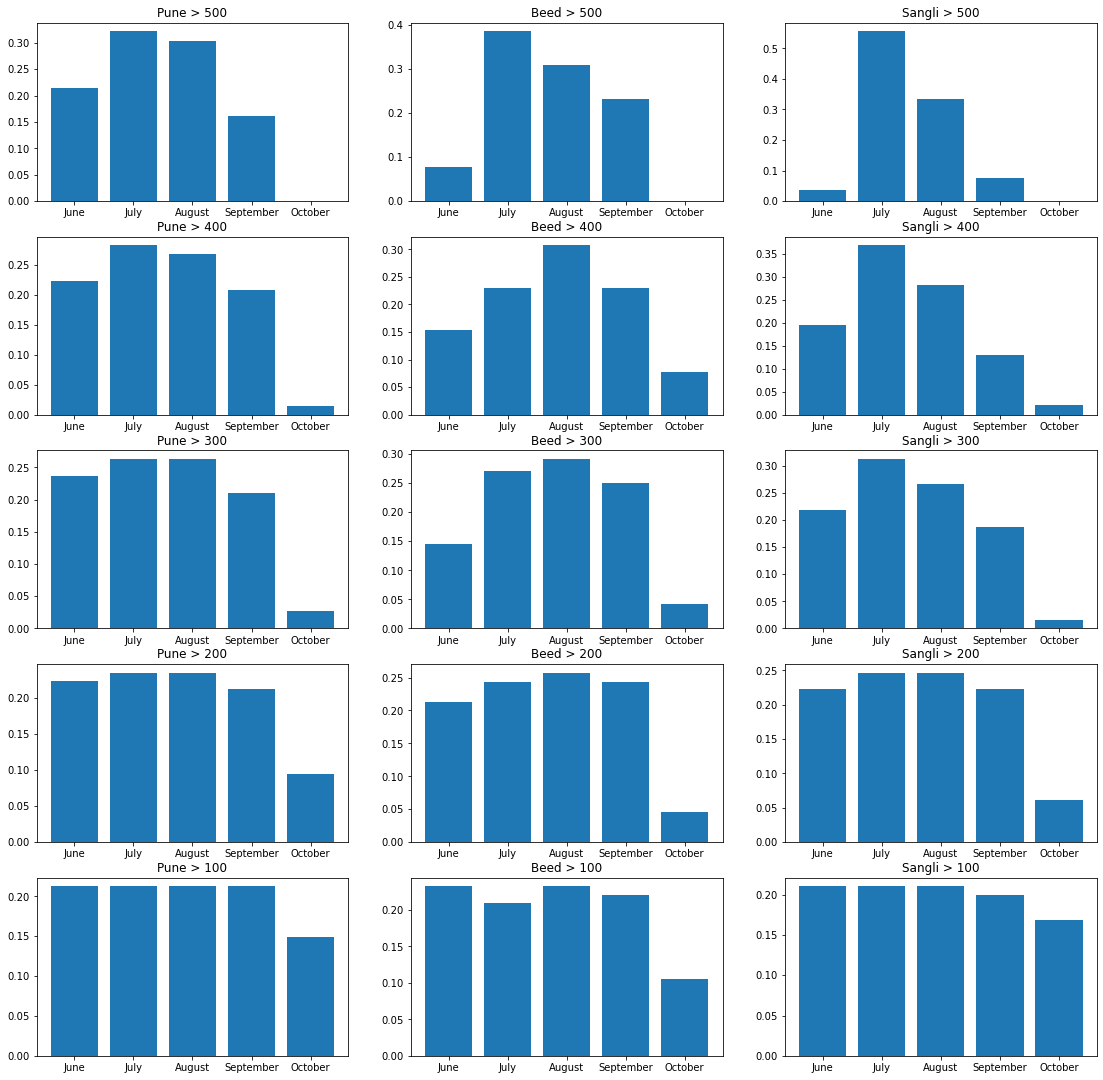

In [62]:
thresh = [500,400,300,200,100]
x = ['June','July','August','September','October']
fig, axs = plt.subplots(5, 3,figsize=(19,19))
for i in range(5):
    axs[i,0].bar(x,Prob(thresh[i],pune))
    axs[i,0].set_title('Pune > {x}'.format(x=thresh[i]))
    axs[i,1].bar(x,Prob(thresh[i],beed))
    axs[i,1].set_title('Beed > {x}'.format(x=thresh[i]))
    axs[i,2].bar(x,Prob(thresh[i],sangli))
    axs[i,2].set_title('Sangli > {x}'.format(x=thresh[i]))
plt.show()